# **Linear Discriminant Analysis (LDA)**

 **Dimensionality Reduction**

*   Dimensionality reduction is generally used when dealing with data which has huge number of features and we don't want to work with that huge amount of data.
*   So we try to reduce the redundancy among the data by projecting them into lower dimensions that retains some meaningful properties of the original data.

*   One more problem in working with data of higher dimensions is overfitting (“curse of dimensionality”).









**Linear Discriminant Analysis**

*   LDA is a popular and efficient dimensionality reduction technique which tries to project the data into lower dimensional space in which the separation among the classes is maximum.
*   This is a supervised technique.



**Objective**


*   Our goal is to maximize the separation between different classes while minimizing the variance within each class.



**Methodology and Mathematical Formulation**


1.   We first compute the mean vectors for all the classes.
2.   Now we compute the within-class scatter matrix.

\begin{align*}
S_W &= \sum_{i=1}^{c} S_i \\
\text{where} \quad S_i &= \sum_{\mathbf{x} \in D_i} (\mathbf{x} - \mathbf{m}_i)(\mathbf{x} - \mathbf{m}_i)^T \\
\text{and} \quad \mathbf{m}_i &= \frac{1}{n_i} \sum_{\mathbf{x} \in D_i} \mathbf{x}
\end{align*}

Here $S_W$ represents the overall within-class scatter matrix, $S_i$ represents the scatter matrix of class "$i$" and $m_i$ is the mean vector of class "$i$".

We need to minimize this value $S_W$.

3. Now we compute between-class scatter matrix.

\begin{align*}
S_B = \sum_{i=1}^{c} N_i (\mathbf{m}_i - \mathbf{m})(\mathbf{m}_i - \mathbf{m})^T
\end{align*}

Here ***m*** is the overall mean, and $m_i$ and $N_i$ are the sample mean and sizes of the respective classes.

We need to maximize this value $S_B$.

4. Since we need to maximize $S_B$ while minimizing $S_W$, we solve the eigen value problem for the matrix $S^{-1}_WS_B$.

5. We find the eigen values and eigen vectors for the above mentioned matrix, sort them in descending order of their eigen values and choose the first ***k*** corresponding eigen vectors as our linear discriminants.

6. Using the eigen vectors we got from previous step, we transform our dataset into this new subspace.

\begin{align*}
Y = X \times W
\end{align*}

Here $Y$ is the transformed dataset, $X$ is the initial dataset and $W$ is our top ***k*** eigen vectors.





## **Implementation**

**Dataset**

I am taking the wine dataset from kaggle to demonstrate the use of LDA. This dataset has 178 samples, 13 features and 3 classes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

The feature names and class names can be viewed below :-

In [2]:
wine_data = datasets.load_wine()
print(wine_data.feature_names)
print(wine_data.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


Number of samples per class are 59, 71 and 48 respectively.

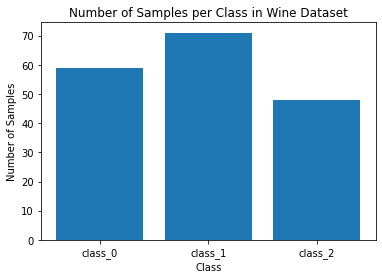

In [3]:
X = wine_data.data
Y = wine_data.target

class_labels, class_counts = np.unique(Y, return_counts=True)

plt.bar(class_labels, class_counts, tick_label=wine_data.target_names)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Class in Wine Dataset')
plt.show()

I am going to demonstrate the use of LDA by reducing the above 13-dimensional feature space into 2-dimensions.

**Implementation from Scratch**

First we'll create a custom class called MyLDA in which we'll implement the LDA functionality from scratch following the steps mentioned in "Methodology and Mathematical Formulation" section.

In [4]:
from sklearn.preprocessing import StandardScaler

class MyLDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.projection_matrix = None

    def fit(self, X, y):
        n_features = X.shape[1]
        classes = np.unique(y)

        # Step-1: Computing class means
        class_means = np.array([np.mean(X[y == c], axis=0) for c in classes])

        # Step-2: Computing within-class scatter matrix
        within_class_scatter = np.zeros((n_features, n_features))
        for c in classes:
            X_c = X[y == c]
            diff = X_c - class_means[c]
            within_class_scatter += np.dot(diff.T, diff)

        # Step-3: Computing between-class scatter matrix
        overall_mean = np.mean(X, axis=0)
        between_class_scatter = np.zeros((n_features, n_features))
        for c in classes:
            n = X[y == c].shape[0]
            diff = class_means[c] - overall_mean
            between_class_scatter += n * np.outer(diff, diff)

        # Step-4: Solving generalized eigenvalue problem
        eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(within_class_scatter).dot(between_class_scatter))

        # Step-5: Sorting eigenvalues and eigenvectors
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[:, idxs]
        self.projection_matrix = eigenvectors[:, :self.n_components]

    def transform(self, X):
        return np.dot(X, self.projection_matrix)


Now we'll call this custom LDA class, project our wine dataset and plot the projected 2-dimensional data.

c:\Users\cchan\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


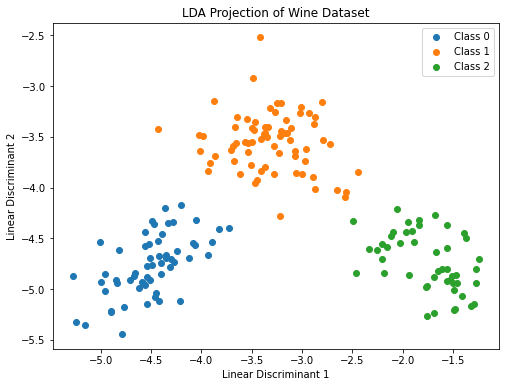

In [5]:
my_lda = MyLDA(2)
my_lda.fit(X, Y)
my_X_projected = my_lda.transform(X)

# Plotting transformed data
plt.figure(figsize=(8, 6))
for class_label in np.unique(Y):
    plt.scatter(my_X_projected[Y == class_label, 0], my_X_projected[Y == class_label, 1], label=f"Class {class_label}")

plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.title("LDA Projection of Wine Dataset")
plt.legend()
plt.show()

As we can see from the above figure, the 3 classes can be clearly distnguished when projected onto 2-dimensional subspace using LDA technique. This can't be done if we use the original data which has 13 dimensions. This shows us the effectiveness of LDA.

**Implementation using in-built LDA**

There is already an in-built implementation of LDA in the scikit-learn library. Now we'll use this in-built function to do the same.

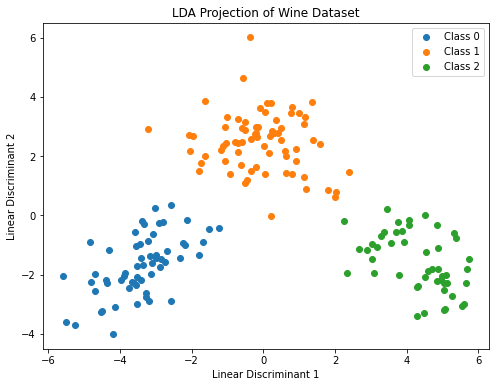

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initializing and fitting the in-built LDA model
lda = LinearDiscriminantAnalysis(n_components=2)
X_projected = lda.fit_transform(X, Y)

# Plotting transformed data
plt.figure(figsize=(8, 6))
for class_label in set(Y):
    plt.scatter(X_projected[Y == class_label, 0], X_projected[Y == class_label, 1]*-1, label=f"Class {class_label}")

plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.title("LDA Projection of Wine Dataset")
plt.legend()
plt.show()

As we can see from the above figure, the plot which we got by using in-built LDA class and the plot which we got by using the LDA class which we implemented from scratch are similar. However, as we can see, there is some difference in the scaling aspect of the axes among the 2 plots. This difference is because of the pre-processing (feature scaling) that is done on the dataset by the in-built LDA class.